<a href="https://colab.research.google.com/github/FariaParvinMegha/thesis/blob/main/SNR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

SNR (dB) of Enhanced Denoised Image: 26.44 dB
SNR (dB) of original Image: -9.34 dB


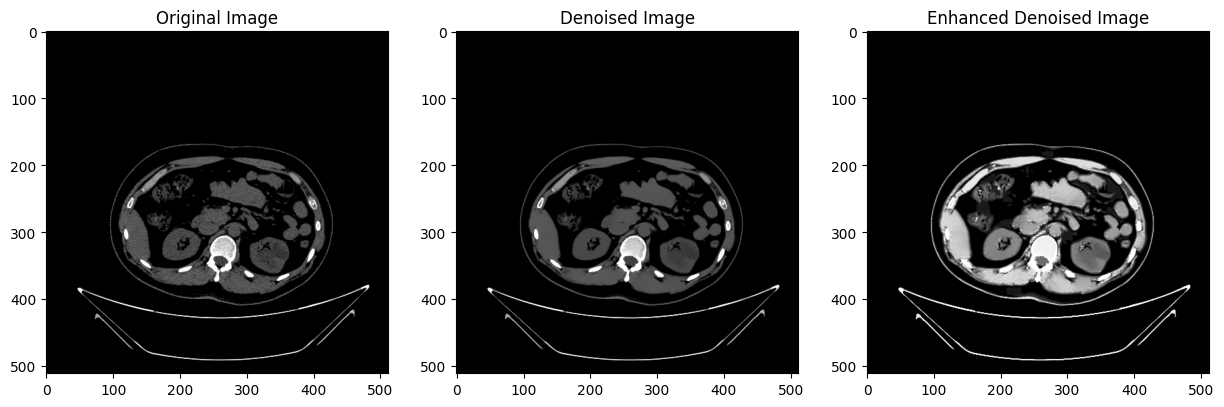

In [48]:
import cv2
import numpy as np
from PIL import Image
from skimage import exposure
import matplotlib.pyplot as plt

def calculate_snr_db(image):
    # Convert the image to a NumPy array
    img_array = np.array(image)

    # Calculate the average pixel value
    average_pixel_value = np.mean(img_array)

    # Calculate the standard deviation of pixel values
    std_deviation = np.std(img_array)

    # Calculate SNR in dB
    snr_db = 10 * np.log10((average_pixel_value ** 2) / (std_deviation ** 2))

    return snr_db

def denoise_image(image):
    # Convert the image to grayscale
    gray_img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Denoise using OpenCV's Non-Local Means Denoising
    denoised_img = cv2.fastNlMeansDenoising(gray_img, None, h=10, templateWindowSize=7, searchWindowSize=21)

    return denoised_img

def enhance_features(image):
    # Enhance features using scikit-image's histogram equalization
    enhanced_img = exposure.equalize_hist(image)

    return enhanced_img

# Load the original image
image_path = "/content/drive/MyDrive/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/Cyst/Cyst- (1000).jpg"
original_image = cv2.imread(image_path)

# Denoise the image using Non-Local Means Denoising
denoised_image = denoise_image(original_image)

# Enhance features in the denoised image
enhanced_denoised_image = enhance_features(denoised_image)

# Calculate SNR for the final image
snr_db_value_enhanced = calculate_snr_db(enhanced_denoised_image)
snr_db_value_original = calculate_snr_db(original_image)
print(f"SNR (dB) of Enhanced Denoised Image: {snr_db_value_enhanced:.2f} dB")
print(f"SNR (dB) of original Image: {snr_db_value_original:.2f} dB")

# Display the images using matplotlib
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')

plt.subplot(1, 3, 2)
plt.imshow(denoised_image, cmap='gray')
plt.title('Denoised Image')

plt.subplot(1, 3, 3)
plt.imshow(enhanced_denoised_image, cmap='gray')
plt.title('Enhanced Denoised Image')

plt.show()
